In [2]:
from plio.io.io_moon_minerology_mapper import M3
from plio.io.hcube import HCube
from libpyhat.derived.m3 import pipe
from libpyhat.derived.m3 import new
import libpyhat as phat
from libpyhat.examples import get_path
from libpyhat.analytics.analytics import *

%pylab inline

# Further documentation on LibPyHat can be found at: 
# https://usgs-astrogeology.github.io/PyHAT/

Populating the interactive namespace from numpy and matplotlib


# How to open an Image

In [3]:
# First, get the path of the file that contains the image you want to view.
# In this example, the program will search for and use the file "M3G20090209T054031_V01_RFL.IMG"
# using the "get_path" function.
filepath = get_path('M3G20090209T054031_V01_RFL.IMG')

# Next, use the M3 constructor found in the plio module to open the image
# by feeding it the filepath.
m3_image = M3(filepath)

# In this case, the variable "m3_image" can now be used as a reference to the given M3 .IMG file.

# Output the dimensions of the image to confirm that it was imported properly. (y, x)
print(m3_image[0].shape)

(23299, 304)


# How to Display a Single Band (By Index)

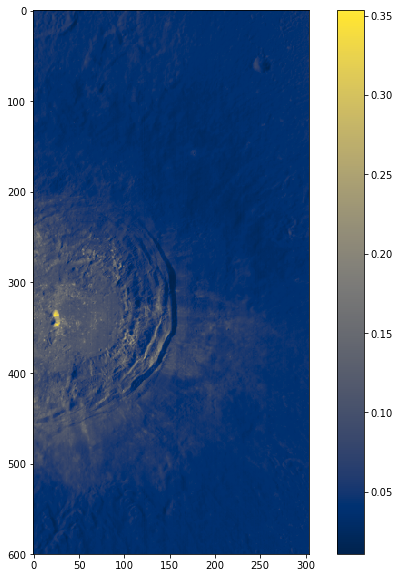

In [4]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

band_index = 3

min_x_val = None
max_x_val = None

min_y_val = 12500
max_y_val = 13100

# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html
color_mapping = 'cividis'

opacity = 1

# Next, run the function to display the band.

# The m3_image[n][y, x] parameter indicates the band index (n),
# the range (y) in the form of min_y_val:max_y_val,
# and the domain (x) is the form of min_x_val:max_x_val
# The 'cmap' parameter is used to select the color mapping,
# and the 'alpha' parameter sets the opacity ratio of the image.
imshow(m3_image[band_index][min_y_val:max_y_val, min_x_val:max_x_val], cmap=color_mapping, alpha = opacity)

# Finally, apply a colorbar to provide a key that describes the relative value of each color.
colorbar()
show()

# How to Display a Single Band (By Label)

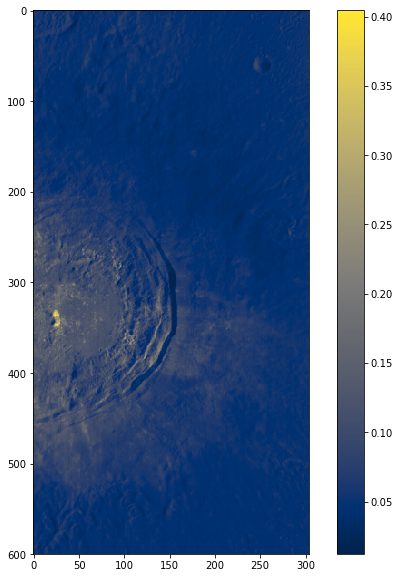

In [5]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# The below print statements list the wavelength labels that are available.
# Simply remove the '#' next to said print statements to view these.
# The position of each wavelength in this output correspond directly to the index
# that they can be accessed at.

# Note: Multiple lines may be commented or uncommented
# by highlighting the lines and using 'ctrl + /'

# print("Wavelengths:\n")
# print(m3_image.wavelengths)
# print("\n")

band_label = 770

min_x_val = None
max_x_val = None

min_y_val = 12500
max_y_val = 13100

# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html
color_mapping = 'cividis'

opacity = 1

# Next, run the function to display the band.

# The m3_image.loc[n][y, x] parameter indicates the band label (n),
# the range (y) in the form of min_y_val:max_y_val,
# and the domain (x) is the form of min_x_val:max_x_val
# The 'cmap' parameter is used to select the color mapping,
# and the 'alpha' parameter sets the opacity ratio of the image.
imshow(m3_image.loc[band_label][min_y_val:max_y_val, min_x_val:max_x_val], cmap=color_mapping, alpha = opacity)

# Finally, apply a colorbar to provide a "key" that describes the relative value of each color.
colorbar()
show()

# How to Generate an Olivine Derived Image

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bd1050', 'bd1250', 'bd1900', 'bd1umratio', 'bd2300', 'bd2umratio', 'bd3000', 'bd620', 'bd950', 'bdi1000', 'bdi2000', 'hlnd_isfeo', 'nbd1400', 'nbd1480', 'nbd2300', 'nbd2700', 'nbd2850', 'np', 'olindex', 'oneum_min', 'oneum_slope', 'oneum_sym', 'pf', 'r1580', 'r2780', 'r540', 'r750', 'r950_750', 'thermal_ratio', 'thermal_slope', 'twoum_ratio', 'twoum_slope', 'utils', 'uvvis', 'visnir', 'visslope', 'visuv', 'warnings']


/usgs/apps/anaconda/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 10.610000000000014
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/usgs/apps/anaconda/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 9.75
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/usgs/apps/anaconda/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 2.869999999999891
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/usgs/apps/anaconda/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and f

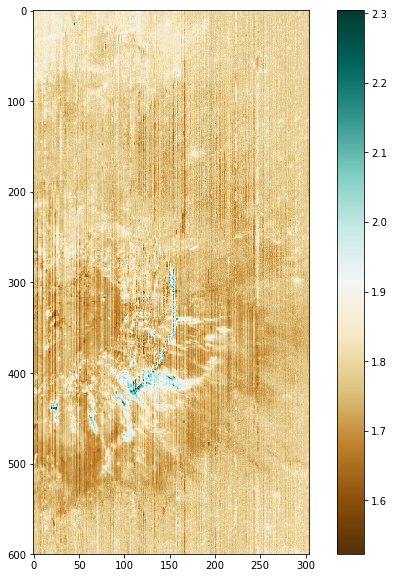

In [6]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# All of the functions similar to olindex can be found in the pipe module.
# A quick link to pipe.py can be found here:
# https://github.com/USGS-Astrogeology/PyHAT/blob/dev/libpyhat/derived/m3/pipe.py
# To be specific, "def olindex(data, **kwargs)" is the function signature for the olindex function
# used below.

# Alternatively, you can quickly list all of the functions (and fields) of the pipe Class
# by using this print statement:
print(dir(pipe))

# Run the olivine index method and store the result in a variable.
olivine_index_result = pipe.olindex(m3_image)

# Since this processes the entire image, some constraints can be applied.
y_clip_min = 12500
y_clip_max = 13100

x_clip_min = None
x_clip_max = None

dir(pipe)

# Next, run the function to display the band.

# Note: using a lower alpha percentage allows the output to be used as an overlay.
imshow(olivine_index_result[ y_clip_min : y_clip_max, x_clip_min : x_clip_max ], cmap='BrBG', alpha = 1)

# Finally, display the associated color key (colorbar) alongside the band.
colorbar()
show()

# How to Zoom in on a Visualization.

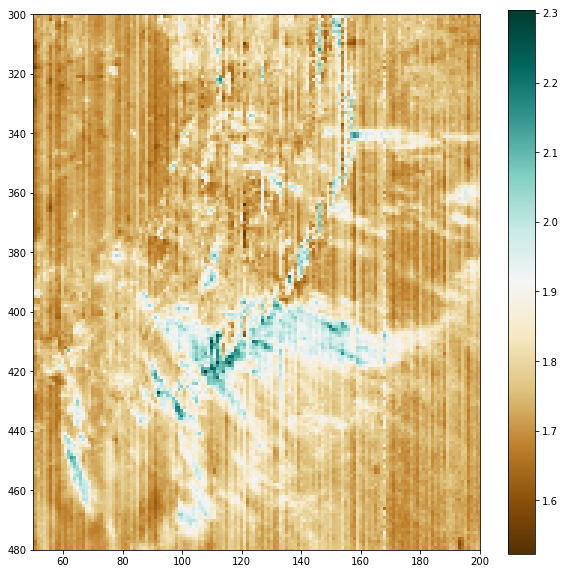

In [7]:
# Set the size of the figure here.
figure_width = 10
figure_height = 10

figure(1, figsize=(figure_width, figure_height))

# Set the region of interest:
x_min = 50
x_max = 200

y_min = 300
y_max = 480

# This shows the same image as the previous cell. Limits will be used to zoom in on the desired area.
imshow(olivine_index_result[ y_clip_min : y_clip_max, x_clip_min : x_clip_max ], cmap='BrBG', alpha = 1)

# Setting limits rather than clipping a smaller section will maintain
# the color-mapping from the initial image you wish to zoom in on.
xlim(x_min, x_max)
ylim(y_max, y_min)

# Finally, display the associated color key (colorbar) alongside the pixel.
colorbar()
show()

# How to Display a Multi-Band Derived Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wavelength list:

 [ 460.99  500.92  540.84  580.76  620.69  660.61  700.54  730.48  750.44
  770.4   790.37  810.33  830.29  850.25  870.21  890.17  910.14  930.1
  950.06  970.02  989.98 1009.95 1029.91 1049.87 1069.83 1089.79 1109.76
 1129.72 1149.68 1169.64 1189.6  1209.57 1229.53 1249.49 1269.45 1289.41
 1309.38 1329.34 1349.3  1369.26 1389.22 1409.19 1429.15 1449.11 1469.07
 1489.03 1508.99 1528.96 1548.92 1578.86 1618.79 1658.71 1698.63 1738.56
 1778.48 1818.4  1858.33 1898.25 1938.18 1978.1  2018.02 2057.95 2097.87
 2137.8  2177.72 2217.64 2257.57 2297.49 2337.42 2377.34 2417.26 2457.19
 2497.11 2537.03 2576.96 2616.88 2656.81 2696.73 2736.65 2776.58 2816.5
 2856.43 2896.35 2936.27 2976.2 ]

Index of wavelength 750.44 : 8


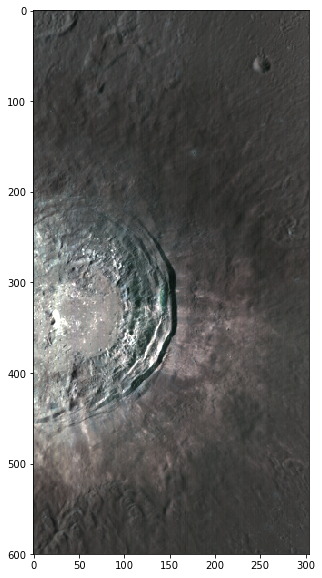

In [9]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Here you can specify which bands you would like to use in the composite image.
# Note: The ordering of the bands is Red, Green, Blue.

# Since wavelengths 460 and 500 in this example
# seemed like outlier values, I made sure to maintain
# the proper delta between Red and Green (170) and Green and Blue (60)
rgb_wavelengths = [990, 810, 750]

# Stores the list of wavelengths in a variable.
wavelengths = m3_image.wavelengths

# Displays the list of wavelengths
print("Wavelength list:\n\n", wavelengths)

# Prints the index of the given value. (Must use exact values)
# Since the "where()" function encapsulates the corresponding index in a list and
# then a tuple, the [0][0] at the end is used to extract the list from the tuple, 
# and then the index from of the list.
wavelength_index_search = 750.44
searched_wavelength_index = where(wavelengths == wavelength_index_search)[0][0]

# The search is then formatted and printed.
print("\nIndex of wavelength", wavelength_index_search, ":", searched_wavelength_index)

min_x_val = None
max_x_val = None

min_y_val = 12500
max_y_val = 13100

opacity = 1

# Note: multiplying the composite array will scale the value of the intensities, and therefore the brightness
# of the output image. In this case, the image is brightened by a factor of 5.
multiband = m3_image.loc[rgb_wavelengths] * 5

multiband = np.moveaxis(multiband, 0, -1)  # The axis movement is required for a 3-band plot.

imshow(multiband[min_y_val:max_y_val, min_x_val:max_x_val], alpha = opacity)

# You can also specify a range and domain to acquire a subset of the image. 
# The syntax to do this would be: [bands, ystart:ystop, xstart:xstop].
show()

# How to Generate a 'mustard' Derived Image (Buggy)

/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/derived/utils.py:192: UserWarning: Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.
  warnings.warn('Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.')


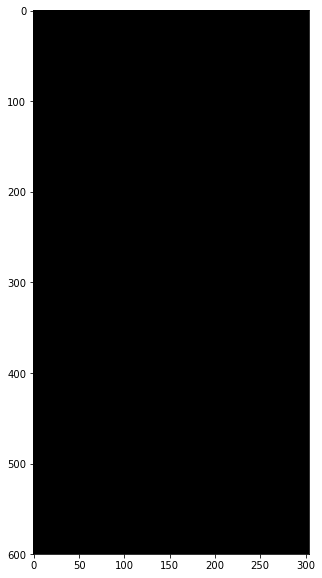

In [10]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

mustard_result = new.mustard(m3_image)

min_x_val = None
max_x_val = None

min_y_val = 12500
max_y_val = 13100

# Produces black square when result is fed into imshow.
# This is likely because the method to produce the mustard
# derived image needs some tweaking.
imshow(mustard_result[min_y_val:max_y_val, min_x_val:max_x_val])

# How to Export the Result to a GeoTiff with Spatial Information (WIP)

In [11]:
# Outputting the olivine_index_result as a GeoTiff file.
# Currently not working as intended.
import gdal

filename = "test.tif"

output_path = "/home/egault/Desktop/geotiff_export/" + filename

arr = olivine_index_result
[cols, rows] = arr.shape
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(output_path, rows, cols, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(m3_image.geotransform)

# Not quite sure how to connect the spatial reference to the outdata.
#outdata.SetSpatialRef(m3_image.spatial_reference)
outdata.GetRasterBand(1).WriteArray(arr)

# Saves the outdata to the outfile location.
outdata.FlushCache()
outdata = None

# How to Export Any Kind of Figure to a .png File

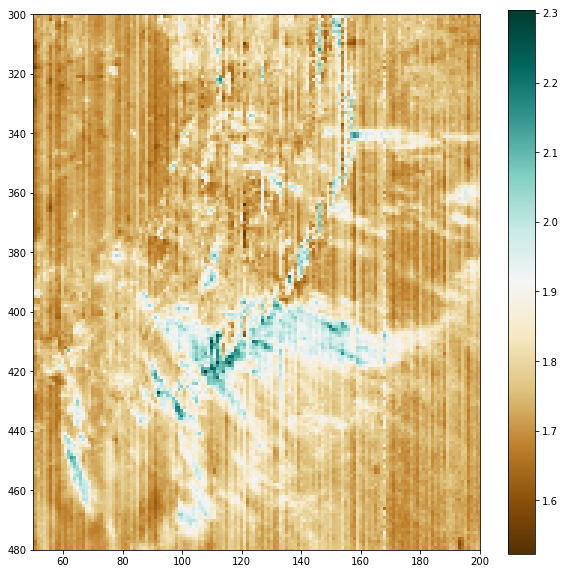

In [12]:
# First, create and display the figure or plot you wish to save as a .png:

# Set the size of the figure here.
figure_width = 10
figure_height = 10

figure(1, figsize=(figure_width, figure_height))

# Set the region of interest:
x_min = 50
x_max = 200

y_min = 300
y_max = 480

# This shows the same image as the previous cell. Limits will be used to zoom in on the desired area.
imshow(olivine_index_result[ y_clip_min : y_clip_max, x_clip_min : x_clip_max ], cmap='BrBG', alpha = 1)

# Setting limits rather than clipping a smaller section will maintain
# the color-mapping from the initial image you wish to zoom in on.
xlim(x_min, x_max)
ylim(y_max, y_min)

# Next, display the associated color key (colorbar) alongside the pixel.
colorbar()

# Now that the figure is displayed, input the desired filename and output path.
# The filetype of the image will be determined by the filename; most backends support png, pdf, ps, eps and svg.
filename = "test.png"

output_path = "/home/egault/Desktop/geotiff_export/" + filename

# Finally, call the savefig function to save the displayed figure to where your output path leads.
savefig(output_path)

# Note: running the 'show' function will flush the data from the figure, so be sure to call it after
# the image is saved.
show()

# How to Extract Spectra at an Individual Pixel

Intensities:

 [0.03789838 0.04091737 0.04322467 0.04462842 0.04511406 0.04465136
 0.04561899 0.04433839 0.04781924 0.04705965 0.04612584 0.04070226
 0.04084679 0.04207868 0.04146109 0.04016583 0.04091419 0.03773685
 0.03341746 0.0357194  0.032383   0.03003889 0.03211585 0.03181625
 0.03302251 0.03599859 0.03483788 0.03577426 0.03760847 0.03630954
 0.03648598 0.03808242 0.03738376 0.03996696 0.03811541 0.0394094
 0.041234   0.04298286 0.04240871 0.04549184 0.04191608 0.04478504
 0.04962031 0.05213461 0.0485626  0.04924619 0.05051542 0.05208218
 0.0521628  0.05422963 0.0575953  0.0566863  0.05696688 0.05801455
 0.05822909 0.05965696 0.06044149 0.05904108 0.06034545 0.06211396
 0.06272782 0.06277627 0.06297257 0.0630966  0.06542161 0.0648378
 0.06461009 0.06790072 0.06689042 0.07011881 0.06788929 0.07095862
 0.07010458 0.07318611 0.07656092 0.07249377 0.07209945 0.07384973
 0.07020411 0.07553271 0.07327207 0.07170658 0.07065658]


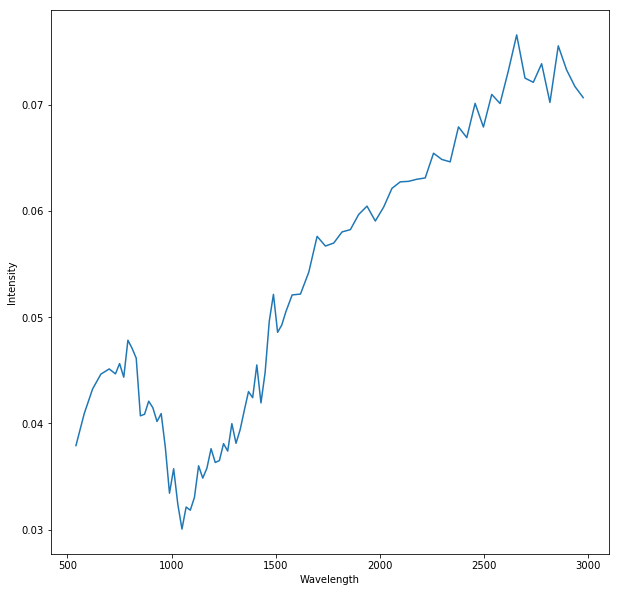

In [13]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Since the clip_roi function may require modification to prevent data loss,
# manually clipping the image will work for now.

# Clipping allows the input values to mirror the scaling of the images examined
# from previous cells.
clip_min_band_index = None
clip_max_band_index = None

clip_min_x = None
clip_max_x = None

clip_min_y = 12500
clip_max_y = 13100

clipped_m3 = m3_image[clip_min_band_index:clip_max_band_index, 
                      clip_min_y:clip_max_y, 
                      clip_min_x:clip_max_x]

# Here you can input the data that indicates where the pixel is located
# with regard to the clipped image.

# Note: the default values here are situated at a high-intensity pixel for
# olivine.
min_band_index = 2
max_band_index = None

min_y_val = 420
max_y_val = 421

min_x_val = 108
max_x_val = 109

# Obtain the pixel and store it in a variable.
pixel_m3 = clipped_m3[min_band_index:max_band_index, min_y_val:max_y_val, min_x_val:max_x_val]

# Convert the intensity list into a 1-Dimensional list.
pixel_m3 = pixel_m3.flatten()

# Diplay the (1-D) list of intensities.
print("Intensities:\n\n", pixel_m3)

plot(m3_image.wavelengths[min_band_index:max_band_index], pixel_m3)

xlabel('Wavelength')

ylabel('Intensity')
show()
# Note: The graph produced here does not have continuum removal applied.

# How to Extract Spectra in a ROI

Intensities:

 [0.06663906 0.07420718 0.07792661 0.08183014 0.08663676 0.08729498
 0.08630515 0.08613898 0.08483903 0.0826638  0.08010923 0.08159705
 0.07867432 0.07868254 0.07710634 0.07665347 0.07627927 0.07463653
 0.07394253 0.07417305 0.07395845 0.07453242 0.07525664 0.07703809
 0.07922148 0.08176551 0.08439714 0.08595833 0.0873512  0.08893207
 0.09010842 0.09129    0.0922825  0.09398659 0.09480579 0.0964511
 0.09868176 0.10042427 0.10161477 0.10507655 0.10662317 0.10924053
 0.11185741 0.1136414  0.11625126 0.11740652 0.12058542 0.1244933
 0.12753534 0.13176541 0.1334547  0.13481927 0.13576962 0.13741004
 0.13794893 0.13929859 0.14017424 0.14170039 0.14362611 0.14512603
 0.14647987 0.14804754 0.15072131 0.15252721 0.15522127 0.157155
 0.1597024  0.16134739 0.16409689 0.16791108 0.16996321 0.17309466
 0.1756877  0.17876008 0.18177399 0.18390217 0.18634538 0.1849402
 0.18374212 0.1919925  0.19528224 0.19669628 0.2026205 ]


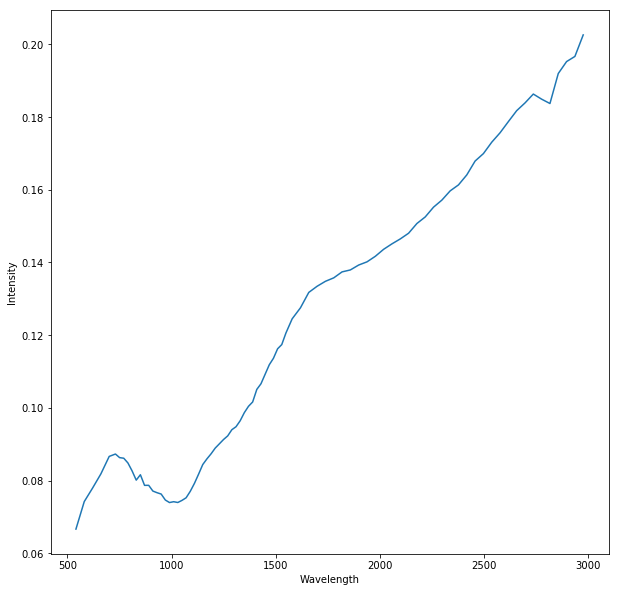

In [14]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Since the clip_roi function may require modification to prevent data loss,
# manually clipping the image will work for now.

# Clipping allows the input values to mirror the scaling of the images examined
# from previous cells.
clip_min_band_index = None
clip_max_band_index = None

clip_min_x = None
clip_max_x = None

clip_min_y = 12500
clip_max_y = 13100

clipped_m3 = m3_image[clip_min_band_index:clip_max_band_index, 
                      clip_min_y:clip_max_y, 
                      clip_min_x:clip_max_x]

# Here you can input the data that indicates where the pixel is located
# with regard to the clipped image.
min_band_index = 2
max_band_index = None

min_y_val = 420
max_y_val = 424

min_x_val = 108
max_x_val = 112

# Obtain the ROI and store it in a variable.
roi_m3 = clipped_m3[min_band_index:max_band_index, min_y_val:max_y_val, min_x_val:max_x_val]

# Averages the intensities into a 1-Dimensional list.
avg_intensity_of_roi = mean(roi_m3, axis=(1,2))

# Diplay the (1-D) list of intensities.
print("Intensities:\n\n", avg_intensity_of_roi)

plot(m3_image.wavelengths[min_band_index:max_band_index], avg_intensity_of_roi)

xlabel('Wavelength')
ylabel('Intensity')
show()

# Note: The graph produced here does not have continuum removal applied.

# How to Plot Multiple Spectra in One Figure

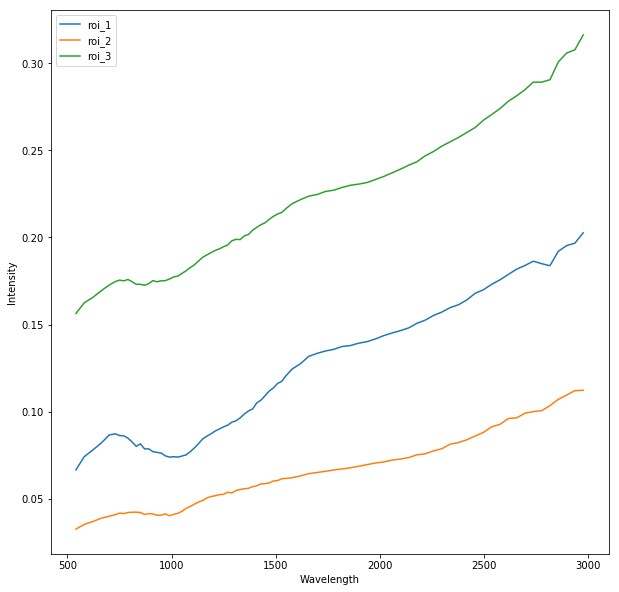

In [15]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Since the clip_roi function may require modification to prevent data loss,
# manually clipping the image will work for now.

# Clipping allows the input values to mirror the scaling of the images examined
# from previous cells.
clip_min_band_index = None
clip_max_band_index = None

clip_min_x = None
clip_max_x = None

clip_min_y = 12500
clip_max_y = 13100

clipped_m3 = m3_image[clip_min_band_index:clip_max_band_index, 
                      clip_min_y:clip_max_y, 
                      clip_min_x:clip_max_x]

##############################################################################
# Here you can input the data that indicates where the ROI or pixel is located
# with regard to the clipped image.
min_band_index_1 = 2
max_band_index_1 = None

min_y_val_1 = 420
max_y_val_1 = 424

min_x_val_1 = 108
max_x_val_1 = 112

label1 = "roi_1"

# Obtain the ROI and store it in a variable.
roi_1 = clipped_m3[min_band_index_1 : max_band_index_1,
                    min_y_val_1 : max_y_val_1, 
                    min_x_val_1 : max_x_val_1]

# Averages the intensities into a 1-Dimensional list.
avg_intensity_of_roi_1 = mean(roi_1, axis=(1,2))

# Diplay the 1D list of intensities.
# print(avg_intensity_of_roi)

plot(m3_image.wavelengths[min_band_index_1 : max_band_index_1], avg_intensity_of_roi_1, label=label1)

######################################################################################
# Here you can input the data that indicates where the seocond ROI or pixel is located
# with regard to the clipped image.
min_band_index_2 = 2
max_band_index_2 = None

min_y_val_2 = 1
max_y_val_2 = 5

min_x_val_2 = 50
max_x_val_2 = 54

label2 = "roi_2"

# Obtain the ROI and store it in a variable.
roi_2 = clipped_m3[min_band_index_2 : max_band_index_2,
                    min_y_val_2 : max_y_val_2, 
                    min_x_val_2 : max_x_val_2]

# Averages the intensities into a 1-Dimensional list.
avg_intensity_of_roi_2 = mean(roi_2, axis=(1,2))

# Diplay the 1D list of intensities.
# print(avg_intensity_of_roi)

# Plotting a second line will automatically color it differently.
plot(m3_image.wavelengths[min_band_index_2 : max_band_index_2], avg_intensity_of_roi_2, label=label2)

####################################################################################
# Here you can input the data that indicates where the third ROI or pixel is located
# with regard to the clipped image.

min_band_index_3 = 2
max_band_index_3 = None

min_y_val_3 = 430
max_y_val_3 = 434

min_x_val_3 = 115
max_x_val_3 = 119

label3 = "roi_3"

# Obtain the ROI and store it in a variable.
roi_3 = clipped_m3[min_band_index_3 : max_band_index_3,
                    min_y_val_3 : max_y_val_3, 
                    min_x_val_3 : max_x_val_3]

# Averages the intensities into a 1-Dimensional list.
avg_intensity_of_roi_3 = mean(roi_3, axis=(1,2))

# Since roi_1 and roi_3 intersect, you can scale or 
# offset the line by respectively multiplying or adding a number to the array.
avg_intensity_of_roi_3 = avg_intensity_of_roi_3 + .1

# Diplay the 1D list of intensities.
# print(avg_intensity_of_roi)

# Plotting additional lines will automatically color it differently.
plot(m3_image.wavelengths[min_band_index_3 : max_band_index_3], avg_intensity_of_roi_3, label=label3)


xlabel('Wavelength')
ylabel('Intensity')
legend()
show()

# Note: The graph produced here does not have continuum removal applied.

# How to Extract Spectra with a Function Applied

/usgs/apps/anaconda/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 41.99000000000001
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))


[[-0.5633993  -0.53907835 -0.4841863  -0.48768377]
 [-0.504598   -0.48212934 -0.47250473 -0.4827757 ]
 [-0.47792542 -0.48927498 -0.5034981  -0.47176874]
 [-0.4772526  -0.49946487 -0.49693727 -0.4689213 ]]


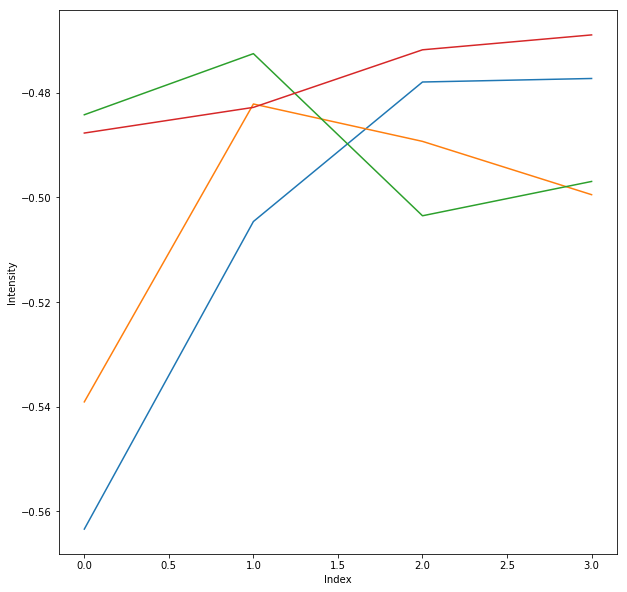

In [16]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Since the clip_roi function may require modification to prevent data loss,
# manually clipping the image will work for now.

# Clipping allows the input values to mirror the scaling of the images examined
# from previous cells.
clip_min_band_index = None
clip_max_band_index = None

clip_min_x = None
clip_max_x = None

clip_min_y = 12500
clip_max_y = 13100

# Here you can input the data that indicates where the spectra is located
# with regard to the clipped image.
# min_band_index = 2
# max_band_index = None

band_depth_result = pipe.bd620(m3_image)[clip_min_y : clip_max_y, 
                                         clip_min_x : clip_max_x]


min_y_val = 420
max_y_val = 424

min_x_val = 108
max_x_val = 112

# Obtain the ROI and store it in a variable.
roi_bd = band_depth_result[min_y_val : max_y_val, min_x_val : max_x_val]

#roi_bd = roi_bd.flatten()

print(roi_bd)

length = roi_bd.size


# Not sure how this should be plotted, if at all.

# Applying a function to the given spectra transforms it from
# a 3-D array to a 2-D array in most cases, so plotting for each wavelength like before
# will not work.
plot(roi_bd)

xlabel('Index')
ylabel('Intensity')
show()
# Note: The spectra processed here does not have continuum removal applied.

# How to Perform Continuum Removal

Wavelengths:

[ 460.99  500.92  540.84  580.76  620.69  660.61  700.54  730.48  750.44
  770.4   790.37  810.33  830.29  850.25  870.21  890.17  910.14  930.1
  950.06  970.02  989.98 1009.95 1029.91 1049.87 1069.83 1089.79 1109.76
 1129.72 1149.68 1169.64 1189.6  1209.57 1229.53 1249.49 1269.45 1289.41
 1309.38 1329.34 1349.3  1369.26 1389.22 1409.19 1429.15 1449.11 1469.07
 1489.03 1508.99 1528.96 1548.92 1578.86 1618.79 1658.71 1698.63 1738.56
 1778.48 1818.4  1858.33 1898.25 1938.18 1978.1  2018.02 2057.95 2097.87
 2137.8  2177.72 2217.64 2257.57 2297.49 2337.42 2377.34 2417.26 2457.19
 2497.11 2537.03 2576.96 2616.88 2656.81 2696.73 2736.65 2776.58 2816.5
 2856.43 2896.35 2936.27 2976.2 ]




/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/transform/continuum.py:106: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y = np.apply_along_axis(correction, axis, data[nodeidx],
/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/transform/continuum.py:111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  corrected[corridx] = data[corridx] / y
/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/transform/continuum.py:112: FutureWarning: Using a non-tuple sequence for multidimensio

Intensities:

[1.         1.076235   1.0973732  1.1175352  1.1455066  1.1301599
 1.1043167  1.0863757  1.0613844  1.0210516  0.9771941  0.9734469
 0.9306781  0.9184115  0.88969207 0.87134385 0.8552426  0.8267132
 0.806088   0.80128634 0.7854272  0.78049964 0.7829783  0.7900973
 0.8035494  0.82261014 0.837494   0.8444888  0.8495895  0.8554815
 0.8573012  0.8618807  0.8603126  0.8692583  0.86611915 0.8724109
 0.8842579  0.89192045 0.8935109  0.9158978  0.9186512  0.9336109
 0.9508271  0.9594553  0.96931815 0.96841764 0.9837481  1.0000954
 1.0068825  1.0236001  1.0207717  1.0133448  1.0053649  1.0005987
 0.9892733  0.984329   0.9770764  0.97221756 0.9708334  0.9675099
 0.96308935 0.95946336 0.9625788  0.9599192  0.9651438  0.963614
 0.9651678  0.9659339  0.96876526 0.9811162  0.9774438  0.9839744
 0.9863945  0.9918898  0.9980482  0.99426186 0.9931213  0.97731054
 0.95675826 0.9902953  0.99120545 0.985507   1.        ]


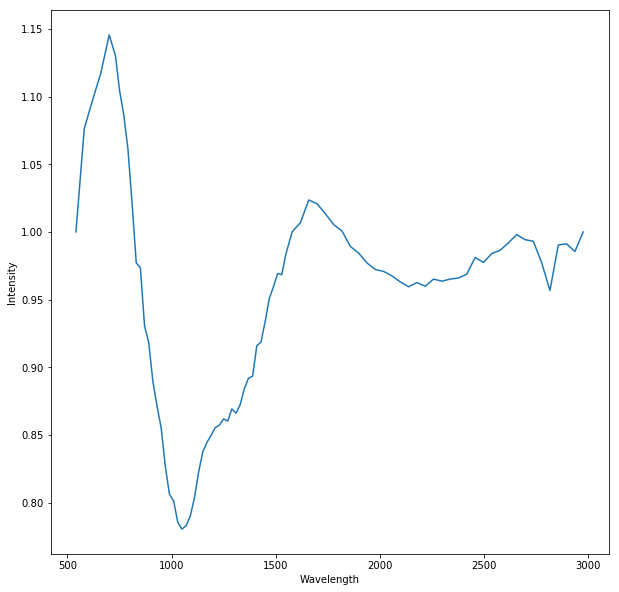

In [17]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Clipping allows the input values to mirror the scaling of the images examined
# in previous cells.
clip_min_band_index = None
clip_max_band_index = None

x_clip = (0, 304)
y_clip = (12500, 13100)

# Returns an HCube object to be used for continuum removal.
clipped_m3 = m3_image.clip_roi(y_clip, x_clip, (0,999999))

# The below print statements list the wavelengths that are available.
# Simply remove the '#' next to said print statements to view these.

# Note: Multiple lines may be commented or uncommented
# by highlighting the lines and using 'ctrl + /'

print("Wavelengths:\n")
print(clipped_m3.wavelengths)
print("\n")


# Corrects the continuum for the wavelengths 540 to 2976
# The first two wavelengths are excluded, since they are massive outliers.
nodes = [540, 2976]

# This node parameter made a plateu-like output, which may not be ideal
# for M3 analysis.
# nodes = [660, 870, 1049, 1230, 1738]

# Runs the continuum_correct function on the HCube.
clipped_m3 = clipped_m3.continuum_correct(nodes, adaptive=False)

# Here you can input the data that indicates where the ROI is located
# with regard to the clipped image.
min_band_index = 2
max_band_index = None

# Can be done using a single pixel or a ROI.
min_y_val = 420
max_y_val = 424

min_x_val = 108
max_x_val = 112

# Obtain the ROI or pixel and store it in a variable.
pixel_m3 = clipped_m3[min_band_index : max_band_index, min_y_val : max_y_val, min_x_val : max_x_val]

# Averages the intensities into a 1-Dimensional list.
avg_intensity_of_roi = mean(pixel_m3, axis=(1, 2))

# Diplay the 1-D list of intensities.
print("Intensities:\n")
print(avg_intensity_of_roi)

plot(m3_image.wavelengths[min_band_index:max_band_index], avg_intensity_of_roi)

xlabel('Wavelength')
ylabel('Intensity')
show()

# How to Obtain Horgan Algorithm Parameters

In [2]:
# Since the clip_roi function may require modification to prevent data loss,
# manually clipping the image will work for now.

# Clipping allows the input values to mirror the scaling of the images examined
# from previous cells.
clip_min_band_index = None
clip_max_band_index = None

clip_min_x = None
clip_max_x = None

clip_min_y = 12500
clip_max_y = 13100

clipped_m3 = m3_image[clip_min_band_index:clip_max_band_index, 
                      clip_min_y:clip_max_y, 
                      clip_min_x:clip_max_x]

# Here you can input the data that indicates where the pixel or ROI is located
# with regard to the clipped image.
min_band_index = 2
max_band_index = None

min_y_val = 420
max_y_val = 424

min_x_val = 108
max_x_val = 112

# Obtain the ROI and store it in a variable.
roi_m3 = clipped_m3[min_band_index:max_band_index, min_y_val:max_y_val, min_x_val:max_x_val]


# Function signatures for the horgan algorithms can be found here:
# https://github.com/USGS-Astrogeology/PyHAT/blob/dev/libpyhat/analytics/analytics.py

#########################################
# Calculate the index of the band minima.
minima_wave_index, minima_intensity = band_minima(roi_m3)

print("Band Minima:\n",
      "Wavelength Index:", minima_wave_index,
      "Wavelength Label:", m3_image.wavelengths[minima_wave_index], 
      "Intensity:", minima_intensity)

############################
# Calculate the band center.
# Requires a 1D or 2D array, so I used the continuum-removed version here.
center_wave_index, center_fit = band_center(avg_intensity_of_roi)

print("\nBand Center:\n",
      "Wavelength Index:", center_wave_index[0],
      "Wavelength Label:", m3_image.wavelengths[center_wave_index[0]],
      "\n Center Fit:\n", center_fit)

plot(center_fit)
title("Center Fit")
show()

###############################
# Calculate the band asymmetry.
asym_start = 540.84
asym_end = 1618.79

m3_wavelengths = m3_image.wavelengths

# These values find the index of each wavelength, since the band_asymmetry
# function requires indices, rather than wavelength labels.
# Note: None can be used here to cover the entire domain.
asym_index_start = where( m3_wavelengths == asym_start )[0][0]
asym_index_end = where( m3_wavelengths == asym_end )[0][0]

asymmetric_percentage = band_asymmetry(avg_intensity_of_roi, asym_index_start, asym_index_end)

print("\nBand Asymmetry Percentage:",
      asymmetric_percentage, "\nFrom indices", asym_index_start, "to", asym_index_end,
      "( Wavelengths", asym_start, "to", asym_end, ")")

#############################################################
# Calculate the area under the curve between two wavelengths.
# Select the start and end wavelengths:
area_wavelength_start = 540.84
area_wavelength_end = 1618.79

# These values find the index of each wavelength, since the band_area
# function requires indices, rather than wavelength labels.
# Note: None can be used here to cover the entire domain.
area_index_start = where( m3_wavelengths == area_wavelength_start )[0][0]
area_index_end = where( m3_wavelengths == area_wavelength_end )[0][0]

# This example does not have continuum removed.
area = band_area(avg_intensity_of_roi, 
                 low_endmember=area_index_start, 
                 high_endmember=area_index_end)

print("\nBand Area: ", area[0], "\n",
      "From indices", area_index_start, "to", area_index_end, 
      "( Wavelengths", area_wavelength_start, "to", area_wavelength_end, ")")


NameError: name 'm3_image' is not defined

# How to Clip a Selection of the Image Using the clip_roi Function. 
### (Possibly buggy for M3, but a possible workaround is included)

In [113]:
filepath = 'libpyhat/examples/M3/M3G20090209T054031_V01_RFL.IMG'

initial_m3_obj = M3(filepath)

In [114]:
x_clip = (0, 304)
y_clip = (12500, 13100)

# Returns an HCube object.
clipped_image = initial_m3_obj.clip_roi(y_clip, x_clip, (0,9999999))

# This is a temportary workaround that "casts" the clipped HCube
# back into an M3 object.
sup_hc = M3('libpyhat/examples/M3/M3G20090209T054031_V01_SUP.IMG')
sup_hc._data = clipped_image._data
sup_hc._wavelengths = clipped_image._wavelengths

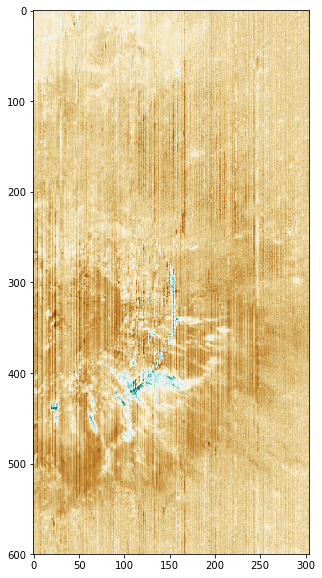

In [115]:
# "Casting" will allow for olindex method to be run.
figure(1, figsize=(10, 10))

oli_data = sup_hc.olindex()
imshow(oli_data, cmap='BrBG')

In [116]:
# Attempting to run olindex on the value directly returned by clip_roi
# will not work, since it returns an HCube object, rather than a M3 object.
oli_data2 = clipped_image.olindex()

AttributeError: 'HCube' object has no attribute 'olindex'

# Bonus: How to Display / Overlay Two or More Images at Once

<Figure size 1440x1440 with 0 Axes>

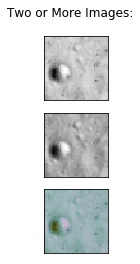

In [3]:
# First,open the desired images and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

figure(1, figsize=(20, 20))

# Initialize the array to hold all of the band images.
images = []

# Specify how many bands you want to display.
number_of_images = 3

# Create the figure object that will hold the band images within subplots.
figure1, axes1 = subplots(number_of_images)

# Choose a title, if you want.
figure1.suptitle('Two or More Images:')

# Add the band images to the image array:

# axes[n] selects the row in which the image will be displayed (n).

# tif_image[i] selects band via index (i) from the tif image. 
# Note: 'tif_image.loc[label]' can also be used in order to select the band by label.

# The cmap parameter is used to select the color mapping.
# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

images.append(axes1[0].imshow(tif_image[0], cmap='Greys'))

images.append(axes1[1].imshow(tif_image[50], cmap='Greys'))


# Note: The same axes can be used to create an overlay.
# However, the alpha channel needs to be below 1 to accomplish this.
images.append(axes1[2].imshow(tif_image[0], cmap='Greys'))

images.append(axes1[2].imshow(tif_image[50], cmap='viridis', alpha = .3))

# By default, subplots have x and y tick labels, so this loop will remove them, if needed.

for axi in axes1:
    axi.set_xticks([])
    axi.set_yticks([])


# This could be useful for future applications, where someone may want to compare two or more specific bands.
# Running two imshows in a row would normally overwrite the previous imshow, so a matplotlib figure object
# can be used to remedy this.
# However, refactoring to make the code easier to manipulate and read would be ideal.
# At the moment, I'm not sure how to resize the image, or add a colorbar to each of them.
show()